<a href="https://colab.research.google.com/github/wogyfikacja/MachineLearning/blob/master/Projekt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb

from google.colab import drive

# getting data and normalizing it

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/NAI/perceptronTrain.csv')
temp = train.loc[:,train.columns != 'nr'].select_dtypes(include='number')
dataNumNorm = (temp - temp.mean())/temp.std()
train[dataNumNorm.columns] = dataNumNorm
train.head()

,nr,one,two,three,four,variety
0,1,-0.827682,-1.005957,0.124544,0.736763,Iris-virginica
1,2,-0.979785,0.407523,-0.928004,-0.884115,Iris-versicolor
2,3,-0.675578,-0.723261,-1.044954,-1.115669,Iris-versicolor
3,4,0.389149,0.407523,0.358443,0.736763,Iris-virginica
4,5,0.389149,0.407523,1.060142,1.199871,Iris-virginica


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/NAI/perceptronTest.csv')
temp = test.loc[:,test.columns != 'nr'].select_dtypes(include='number')
dataNumNorm = (temp - temp.mean())/temp.std()
test[dataNumNorm.columns] = dataNumNorm
test.head()

,nr,one,two,three,four,variety
0,1,1.251286,1.137423,0.456501,0.058878,Iris-versicolor
1,2,-0.804398,0.779057,-0.088929,0.058878,Iris-versicolor
2,3,0.302509,0.062325,0.729216,0.058878,Iris-virginica
3,4,-0.962527,-1.729507,-0.770716,-0.482803,Iris-versicolor
4,5,0.935027,1.137423,0.183786,0.058878,Iris-versicolor


# plot of the training data

Text(0.5, 1.05, 'Training Dataset')

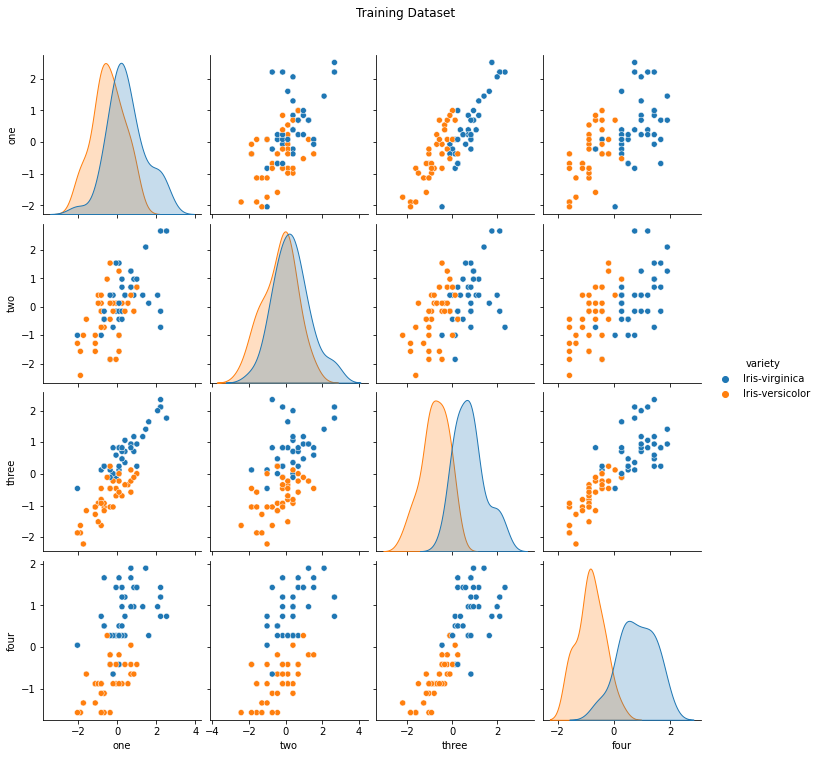

In [ ]:
trainPlots = sb.pairplot(data = train.drop('nr',axis=1),hue='variety')
trainPlots.fig.suptitle('Training Dataset',y=1.05)

# wprowadzanie zmiennych

In [ ]:
stalaUczenia = 0.2 #@param 
wartoscProgu = 0 #@param

# deciding on values needed

In [ ]:
columns = len(train.axes[1]) - 2
columns

4

In [ ]:
wagi = np.ones(columns)
wagi

array([1., 1., 1., 1.])

# training

In [ ]:
trainingCalc = train.loc[:,train.columns != 'nr'].drop('variety',axis=1)

for index,row in trainingCalc.iterrows():

  temp = wagi*row
  final = temp.sum()
  decision = 0
  if final >= wartoscProgu:
    decision = 1
  fdecision = 0
  if train['variety'][index] == 'Iris-versicolor':
    fdecision = 1
  if decision==1:
    wagi = wagi + (fdecision - final)*stalaUczenia*row

wagi

one      0.216266
two      0.145682
three   -0.357374
four    -1.119862
dtype: float64

# adding decided on varieties

In [ ]:
check = test*wagi
test['wynik'] = check.sum(axis = 1)
test

,nr,one,two,three,four,variety,wynik
0,1,1.251286,1.137423,0.456501,0.058878,Iris-versicolor,0.207236
1,2,-0.804398,0.779057,-0.088929,0.058878,Iris-versicolor,-0.094624
2,3,0.302509,0.062325,0.729216,0.058878,Iris-virginica,-0.252037
3,4,-0.962527,-1.729507,-0.770716,-0.482803,Iris-versicolor,0.355986
4,5,0.935027,1.137423,0.183786,0.058878,Iris-versicolor,0.236301
5,6,-0.962527,-1.012774,-0.770716,-0.482803,Iris-versicolor,0.460401
6,7,0.776897,0.420691,0.047429,-0.482803,Iris-versicolor,0.753026
7,8,-0.013750,0.779057,0.047429,-0.211962,Iris-versicolor,0.330940
8,9,-0.646268,-0.654408,-1.452504,-1.295324,Iris-versicolor,1.734571
9,10,0.618768,0.062325,0.047429,0.058878,Iris-versicolor,0.060013


In [ ]:
test['zdecydowane'] = np.where(test['wynik'] > 0,'Iris-versicolor','Iris-virginica')
test

,nr,one,two,three,four,variety,wynik,zdecydowane
0,1,1.251286,1.137423,0.456501,0.058878,Iris-versicolor,0.207236,Iris-versicolor
1,2,-0.804398,0.779057,-0.088929,0.058878,Iris-versicolor,-0.094624,Iris-virginica
2,3,0.302509,0.062325,0.729216,0.058878,Iris-virginica,-0.252037,Iris-virginica
3,4,-0.962527,-1.729507,-0.770716,-0.482803,Iris-versicolor,0.355986,Iris-versicolor
4,5,0.935027,1.137423,0.183786,0.058878,Iris-versicolor,0.236301,Iris-versicolor
5,6,-0.962527,-1.012774,-0.770716,-0.482803,Iris-versicolor,0.460401,Iris-versicolor
6,7,0.776897,0.420691,0.047429,-0.482803,Iris-versicolor,0.753026,Iris-versicolor
7,8,-0.013750,0.779057,0.047429,-0.211962,Iris-versicolor,0.330940,Iris-versicolor
8,9,-0.646268,-0.654408,-1.452504,-1.295324,Iris-versicolor,1.734571,Iris-versicolor
9,10,0.618768,0.062325,0.047429,0.058878,Iris-versicolor,0.060013,Iris-versicolor


# plots of prediction and variety respectively (colors are in reverse, for some reason 😠)

Text(0.5, 1.05, 'Test prediction')

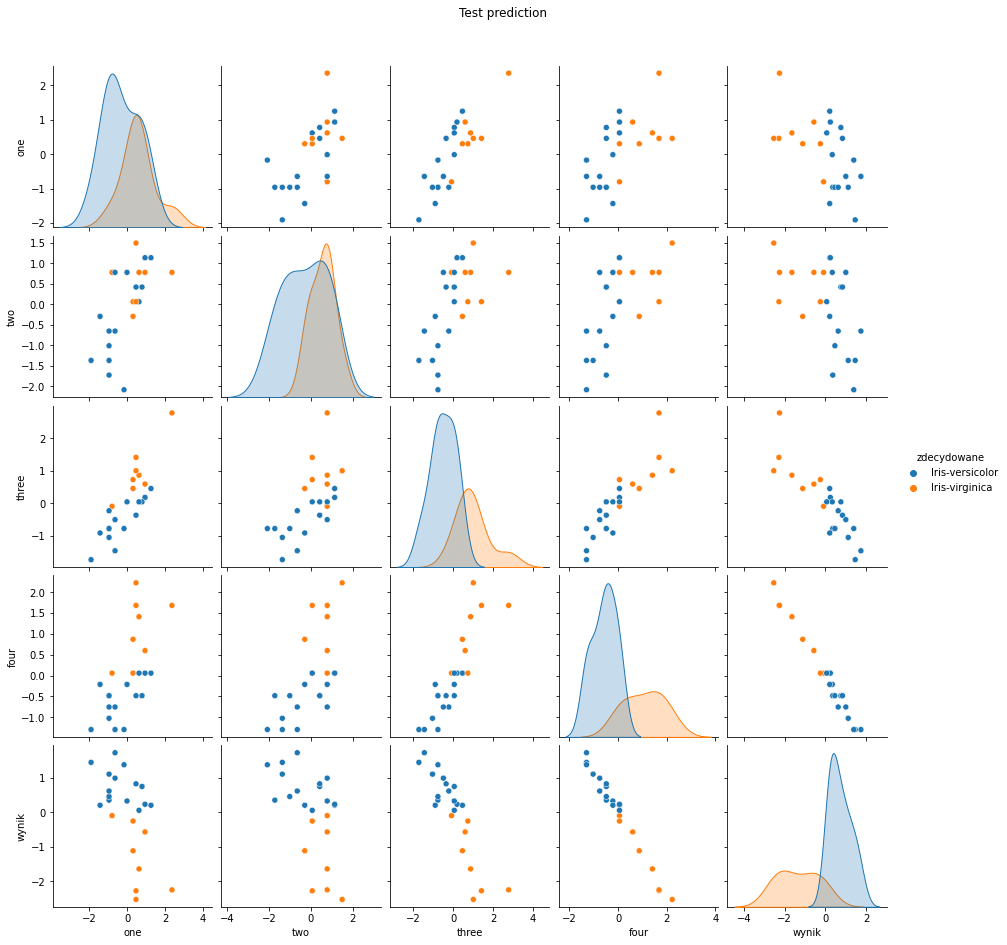

In [ ]:
trainPlots = sb.pairplot(data = test.drop('nr',axis=1).drop('variety',axis=1),hue='zdecydowane')
trainPlots.fig.suptitle('Test prediction',y=1.05)

Text(0.5, 1.05, 'Actual Value')

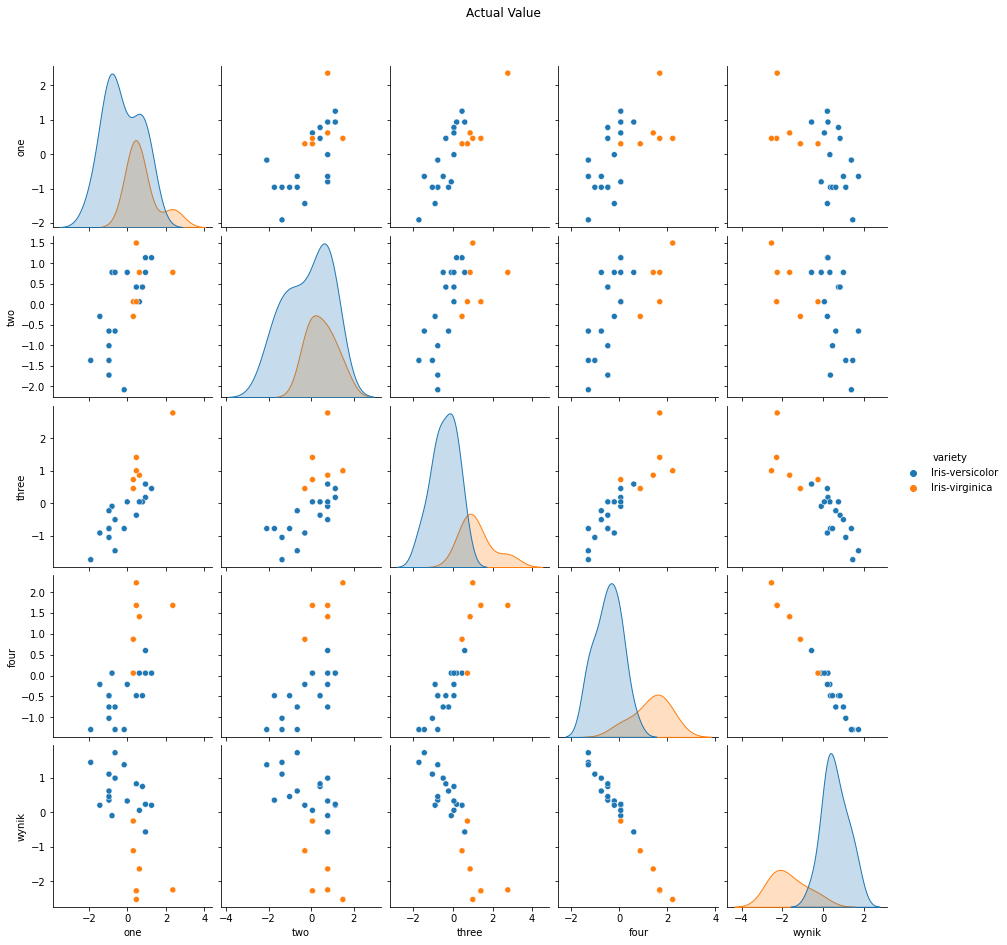

In [ ]:
trainPlots = sb.pairplot(data = test.drop('nr',axis=1).drop('zdecydowane',axis=1),hue='variety')
trainPlots.fig.suptitle('Actual Value',y=1.05)

# accuracy

In [ ]:
count1 = test.loc[test.variety == test.zdecydowane].count()['nr']
count1/len(test)

0.9130434782608695

# snippet for checking one value

In [ ]:
dataNumNorm

,one,two,three,four
0,1.251286,1.137423,0.456501,0.058878
1,-0.804398,0.779057,-0.088929,0.058878
2,0.302509,0.062325,0.729216,0.058878
3,-0.962527,-1.729507,-0.770716,-0.482803
4,0.935027,1.137423,0.183786,0.058878
5,-0.962527,-1.012774,-0.770716,-0.482803
6,0.776897,0.420691,0.047429,-0.482803
7,-0.013750,0.779057,0.047429,-0.211962
8,-0.646268,-0.654408,-1.452504,-1.295324
9,0.618768,0.062325,0.047429,0.058878


In [ ]:
input = '4.8,3.4,1.9,0.2' #@param
inputAsNp = np.fromstring(input,sep=',')
inputAsNp = (inputAsNp - inputAsNp.mean())/inputAsNp.std()

number = (inputAsNp*wagi).sum()
if number>=0:
  print('Iris-versicolor')
else:
  print('Iris-virginica')

number
inputAsNp*wagi

Iris-versicolor


one      0.281026
two      0.070192
three    0.140882
four     1.553300
dtype: float64